## Data Analysis: coursework

#### Measuring the distance between atoms using time of flight neutron diffraction

For this coursework we will look at analysing some data from a time-of-flight neutron diffraction experiment on an aerospace aluminium alloy sample.

Time-of-flight neutron diffraction uses neutrons to measure the distance between atoms. In this technique, a white neutron beam is shone on the sample and large detectors are used to collect the neutrons that are scattered off. The beam is "white" because it contains neutrons with many different velocities and hence different wavelengths. However not all wavelengths are scattered equally: those with wavelengths closer to regular spacing of the atoms in the crystal interfere constructively and scatter much more strongly. This means we can measure the distance between the atoms in the sample by counting how many neutrons are scattered of which wavelength. This is very useful in materials science: we can use this distance to measure the stress in a material, to measure its thermal expansion, to determine its structure and much more.

In [time-of-flight diffraction](http://nmi3.eu/neutron-research/techniques-for-/dynamics/time-of-flight-spectroscopy.html), we use the fact that neutrons with different wavelengths have different velocities, as described by the de Broglie equation:

$$p=mv=\dfrac{h}{\lambda}$$

where $p$ is momentum, $m$ is the mass of a neutron, $v$ its velocity and $\lambda$ its wavelength.

These velocities are not very high. For example, a neutron with a wavelength of $1 \, \mathrm{nm}$ has a velocity of:

$$v=\dfrac{h}{\lambda m}=\dfrac{6.626 \times 10^{-34}}{1.0\times 10^{-9}\times 1.675 \times 10^{-27}} = 395.6 \quad \mathrm{m\,s^{-1}} $$

which just over the speed of sound. In a time-of-flight experiment we send out neutrons in pulses and then count how many scattered neutrons arrive at different times. Of course since time can be converted into wavelength, it can be converted into the spacing between the atoms diffracting, also called the d-spacing.

Neutrons are difficult to detect, so neutron detectors can be very big:

![ToF detectors at FMRII in Germany](https://nmi3.eu/toftof-rex_img_type=content_noresize&rex_img_file=toftof.jpg.jpg)

Neutron counts are statistical measurements, which need to be analysed to give the required interatomic distances. In this coursework you'll be working with data from [ISIS](http://www.isis.stfc.ac.uk/), a neutron source near Harwell in the UK. Each file contains the number of neutrons (intensity) detected that correspond to a given atomic spacing (d-spacing). You will use the data to determine the d-spacing of the material.


###  Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### <span style="color: red"> Question 1: </span>  Reading and plotting data:

You can find the diffraction data for this exercise in the `/coursework_data/` folder. There are 4 files with each one increasing the neutron counting times from the previous one. 

We will start our analysis with the first file. Open `spectrum_1.txt` using a text editor and examine the data. The first column is the d-spacing between adjacent lattice planes in Angstrom and the second column is the intensity in units of neutron counts.


In [ ]:
# reading in the two columns of data from 'spectrum_1.txt' into arrays 'd_spacing' and 'intensity'

In [2]:
d_spacing = np.loadtxt('coursework_data/spectrum_1.txt', skiprows=1,usecols=(0,))
intensity = np.loadtxt('coursework_data/spectrum_1.txt', skiprows=1,usecols=(1,))
print(d_spacing,intensity)

[0.625521 0.625646 0.625771 ... 2.4361   2.43659  2.4368  ] [0. 0. 0. ... 0. 0. 0.]


In [ ]:
# plotting the intensity as a function of d-spacing, where x axis is 'd-spacing (Ang)' and the y axis 'Intensity (counts)'

Text(0, 0.5, 'Intensity (counts)')

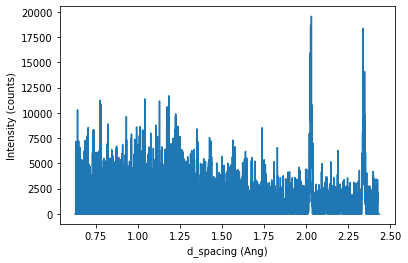

In [3]:
%matplotlib inline
plt.plot(d_spacing,intensity)
plt.xlabel('d_spacing (Ang)')
plt.ylabel('Intensity (counts)')

### <span style="color: red"> Question 2: </span>  Fitting a model to the data:

Next, we want to concentrate on one of the peaks which is at approximately 2 Angstroms d-spacing and fit a curve to that peak. 

In [4]:
d_spacing_2 = np.loadtxt('coursework_data/spectrum_1_2Ang.txt', skiprows=1,usecols=(0,))
intensity_2 = np.loadtxt('coursework_data/spectrum_1_2Ang.txt', skiprows=1,usecols=(1,))

In [ ]:
# plotting the peak at 2 Ang

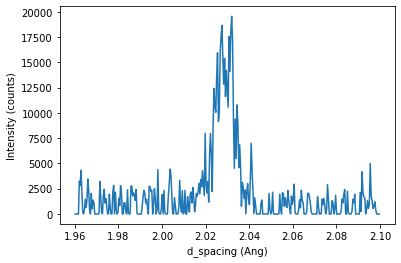

In [5]:
%matplotlib inline
plt.plot(d_spacing_2,intensity_2);
plt.xlabel('d_spacing (Ang)');
plt.ylabel('Intensity (counts)');

We expect the intensity peak to fit a Gaussian function with the following relationship:

$$f(x) = A \exp\Big(-\frac{(x-\mu)^2}{2\sigma^2}\Big), $$

where $A$ is the intensity peak, $x$ is the d-spacing, $\mu$ is the mean d-spacing of the distribution (the central value) and $\sigma$ is the standard deviation. 


#### Define a function `gauss` that takes `x`, `A`, `mu` and `sigma` as the input and holds the form of a Gaussian function as the output: 

In [6]:
A = intensity_2
x = d_spacing_2
mu = np.mean(d_spacing_2)
sigma = np.std(d_spacing_2)

def gauss(x, A, mu, sigma):
    return A*np.exp(-(x-mu)**2/2*sigma**2)

In [ ]:
# using curve_fit to fit the model `gauss` to the data in arrays `d_spacing_2` and `intensity_2`
# assigning the result to variables `popt` and `pcov`

In [7]:
popt, pcov = curve_fit(gauss, d_spacing_2, intensity_2)
print(popt)


[ 1.53685450e+04  2.02881257e+00 -1.98979909e+02]


In [ ]:
# plotting the original data and the fitted model for the peak at 2 Angstroms to check how good the fit is

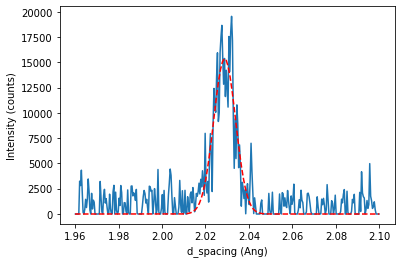

<Figure size 2160x2160 with 0 Axes>

In [8]:
d_spacing=np.linspace(1.96,2.10,160)
intensity=gauss(d_spacing,popt[0],popt[1],popt[2])
%matplotlib inline
plt.plot(d_spacing_2,intensity_2);
plt.xlabel('d_spacing (Ang)');
plt.ylabel('Intensity (counts)');
plt.plot(d_spacing, intensity, '--r')
plt.figure(figsize=(30,30))
plt.show()

### <span style="color: red"> Question 3: </span>  Statistics:

In a neutron diffraction experiment, the counting time is a parameter which we can increase to get better statistics and improve the accuracy of our results. We have repeated the steps in Question 1 and 2, for three more sets of data with increasing counting times called `spectrum_10.txt`, `spectrum_20.txt` and `spectrum_30.txt`. You can find the results in `diffraction_results.txt`.

In [ ]:
# reading in the data from `diffraction_results.txt` into arrays `data_number` and `means`

In [9]:
data_number = np.loadtxt('coursework_data/diffraction_results.txt', skiprows=2 ,usecols=(0,))
means = np.loadtxt('coursework_data/diffraction_results.txt', skiprows=2, usecols=(1,))
print(data_number,means)

[ 1. 10. 20. 30.] [2.02883903 2.0290564  2.0291003  2.02911788]


In [ ]:
# plotting how the mean value varies with the increase of sample number i.e. with increasing the neutron counting time

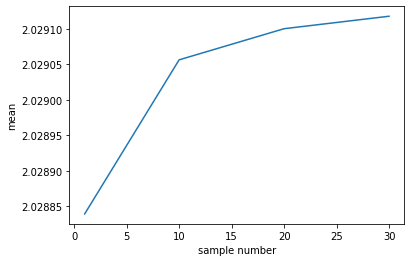

As the sample number increases, the rate of the increase in mean decreases. The curve is convergent, the mean value is approaching a limit.


In [10]:
x= data_number
y= means
plt.plot(x,y)
plt.xlabel('sample number')
plt.ylabel('mean')
plt.show()
print('As the sample number increases, the rate of the increase in mean decreases. The curve is convergent, the mean value is approaching a limit.')

In [ ]:
# Writing the sample number and mean values into a text file `output.txt`, using justified formatting

In [13]:
myFile = open('coursework_data/output.txt','w')
myFile.write('sample number'.rjust(16) + 'mean values'.rjust(16) + '\n')
myFile.write('--------------'.rjust(16) + '--------------'.rjust(16) + '\n')
myFile.write(str(1.0).rjust(16) + str(2.02883902859).rjust(16) + '\n')
myFile.write(str(10.0).rjust(16) + str(2.02905639519).rjust(16) + '\n')
myFile.write(str(20.0).rjust(16) + str(2.02910030336).rjust(16) + '\n')
myFile.write(str(30.0).rjust(16) + str(2.02911787955).rjust(16) + '\n')

myFile.close()

### <span style="color: red">Question 4</span>: Aluminium has a face-centred cubic structure. The peak at 2 angstroms corresponds to a set of planes $(hkl)$ with a characteristic d-spacing. Can you find which set of planes $(hkl)$  this d-spacing corresponds to?

$(h^2 + k^2 + l^2) = \frac{(a^2)}{(d^2)}$

In [12]:
a = 404.95*(10**(-12))
d = 2*10**(-10)
set_of_planes = (a**2)/(d**2)
print('h^2 + k^2 + l^2 = {:f}'.format((a**2)/(d**2)))
print('the set of planes corresponds to (2 0 0)')

h^2 + k^2 + l^2 = 4.099613
the set of planes corresponds to (2 0 0)


In [ ]:
# end of coursework